# Smart Urban Heat Map API

This document refers to the **Open-Data API** of the [Smart Urban Heat Map Bern Project](https://smart-urban-heat-map.ch).

The Smart Urban Heat Map is an initiative of the [Smart City Verein Bern](https://www.smartcity-bern.ch/) to visualize urban heat in the city and region of Bern.   
Valuable pioneering work has been done by the Climatology Group at the [Geographical Institute of the University of Bern (GIUB)](https://www.geography.unibe.ch/index_eng.html),  
which has been operating an urban measurement network since 2018, consisting of around 80 stations.  
The Smart City Verein Bern, together with the company [Abilium GmbH](https://www.abilium.io/), the [Bern University of Applied Sciences](https://www.bfh.ch/de/forschung/forschungsbereiche/public-sector-transformation/) and the company [Meteotest](https://meteotest.ch/),  
has extended this measuring network into the Bern region by around 40 measuring stations.

Based on this measurement network, the Smart Urban Heat Map API offers access to detailed city climate data for the region of Bern, Switzerland.  
Users can retrieve current measurements of temperature, relative humidity, and station metadata, as well as location-bound time series data.  
The data provides valuable insights for urban planning and environmental studies.

Further information on the API, including the [interactive OpenAPI specification](https://meteotest.github.io/urban-heat-API-docs/Swagger/), can be found in the [API documentation](https://meteotest.github.io/urban-heat-API-docs/).

**Disclaimer Temperature Bias:**  
To reduce the potential temperature bias when stations are exposed to direct sunlight, all stations are ventilated before measuring.  
However, in some cases, especially during the day, measured temperatures might still be slightly higher than actual temperatures.

**Licensing Information**  
This data is available under the [Creative Commons Attribution License (CC-BY)](https://creativecommons.org/licenses/by/4.0/).  
Please ensure that you provide proper attribution when using or redistributing this data in your projects or applications.  
Attribution Example: Data provided by the Smart Urban Heat Map Project for Bern, Switzerland.

**Contact Information**  
For technical questions regarding the API, please contact [Meteotest](mailto:office@meteotest.ch).

## Introduction

This is an **interactive Jupyter Notebook** demonstrating step-by-step how data from the API endpoint (https://smart-urban-heat-map.ch/api/1.0/) can be requested via HTTP requests and visualized using Python.   

The notebook can be run **locally or directly in the browser** using [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/meteotest/urban-heat-API-docs/main?labpath=python_examples.ipynb)
or [![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/meteotest/urban-heat-API-docs/blob/main/python_examples.ipynb).

To use the notebook simply execute each code cell one after the other, for example by selecting and pressing **CTRL + ENTER**. The code in the cells can be adapted and expanded to test different outcomes.

The rest of the notebook is organized as follows:
1. [Package Import](#package-import)
2. [HTTP Request](#http-request)
3. [Current Weather Map](#current-weather-map)
4. [Station Timeseries](#station-timeseries)


## Package Import

First we import the python modules that we need

In [2]:
import io # for working with streams (like strings)
import requests # for making standard HTTP requests
import pandas as pd # for storing and manipulating data
import geopandas as gpd # for storing and manipulating geographic data
import matplotlib # for plotting
import folium # for creating maps
import branca # for using colorscales in Folium

## HTTP Request

An HTTP request can be made using the requests module simply by providing the desired endpoint.  
In our case, we want to start by requesting the stations' data from the API endpoint https://smart-urban-heat-map.ch/api/1.0/stations by making a GET:

In [3]:
# Define the URL
url = "https://smart-urban-heat-map.ch/api/v2/latest"

# Make the GET request
response = requests.get(url)

# Display the response status code
response

<Response [200]>

The response object contains the status code of the request. A status code of 200 means that the request was successful.   
The payload of the response can be accessed through the ``text`` property:

In [4]:
# Show only the first 400 characters of the response
response.text[0:400]

'{"type": "FeatureCollection", "features": [{"type": "Feature", "geometry": {"type": "Point", "coordinates": [7.477217, 46.974644]}, "properties": {"stationId": "11117", "name": "Ittigen Papierm\\u00fchle Kreisel", "dateObserved": "2025-09-28T13:42:01Z", "outdated": false, "measurementsPlausible": true, "temperature": 15.280003, "relativeHumidity": 64.59968}}, {"type": "Feature", "geometry": {"type"'

We see that this API endpoint, by default, returns the data in ``GeoJSON`` format, which includes the geoinformation and additional properties of the stations.

## Current Weather Map

### GeoPandas DataFrame

To work with geodata in Python we use the [GeoPandas](https://geopandas.org/en/stable/) module. We can create a GeoPandas DataFrame from the ``GeoJSON`` similar to reading a file.  
Additionally, we can check if the request was successful and if not print an error message by checking the status code.  
Together we get:

In [9]:
# Define the URL
url = "https://smart-urban-heat-map.ch/api/v2/latest"

# Make the GET request
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Read GeoJSON content directly into GeoPandas DataFrame
    stations = gpd.read_file(response.text)
else:
    print(f"Request failed with status code: {response.status_code}")

# Display stations DataFrame
stations

,stationId,name,dateObserved,outdated,measurementsPlausible,temperature,relativeHumidity,geometry
0,11117,Ittigen Papiermühle Kreisel,2025-09-28 13:42:01+00:00,False,True,15.280003,64.599680,POINT (7.47722 46.97464)
1,11076,Niederwangen Papillon Laterne/Bushäuschen,2025-09-28 13:43:02+00:00,False,True,15.955596,65.032650,POINT (7.38623 46.92803)
2,11059,Vordere Länggasse,2025-09-28 13:41:41+00:00,False,True,14.190509,73.554820,POINT (7.43714 46.95171)
3,11129,Stettlen Bernstrasse Laterne,2025-09-28 13:47:54+00:00,False,True,20.722134,51.263294,POINT (7.52504 46.9585)
4,12005,Marktplatz Lyss,2025-09-28 13:43:14+00:00,False,True,16.009003,61.780575,POINT (7.30584 47.0735)
...,...,...,...,...,...,...,...,...
59,11136,BernExpo Asphalt 2.5m,2025-09-28 13:48:37+00:00,False,True,15.234608,67.018234,POINT (7.46684 46.96002)
60,11139,BernExpo Park 0.5m,2025-09-28 12:33:56+00:00,True,True,15.456244,62.034256,POINT (7.46599 46.95973)
61,11138,BernExpo Park 2.5m,2025-09-28 13:42:13+00:00,False,True,15.213244,66.867550,POINT (7.46602 46.95975)
62,11137,BernExpo Asphalt 0.5m,2025-09-28 12:39:15+00:00,True,True,18.981080,55.671246,POINT (7.46681 46.96)


We see that the data is now neatly organized into a table, with the geoinformation stored in the column ``geometry``.

### Map with Folium

Visualizing geoinformation on a map using Python can be easily achieved using the module [Folium](https://github.com/python-visualization/folium), which is a Python wrapper for the JavaScript library [Leaflet.js](https://leafletjs.com/).

First, let's create a map:

In [10]:
# Create a base map
m = folium.Map(location=[stations.geometry.y.mean(), stations.geometry.x.mean()], zoom_start=13)

# Display map
m

We see that the map is already centered on Bern. This is because we have set the center point of the map based on the station data by calculating the mean lon and mean lat coordinates `stations.geometry.x.mean()` and `stations.geometry.y.mean()`, which use the data analysis capabilities of GeoPandas.

Now let's add markers for each station:

In [11]:
# Create a base map
m = folium.Map(location=[stations.geometry.y.mean(), stations.geometry.x.mean()], zoom_start=13)#, tiles="CartoDB positron")

# Iterate through each station in the GeoPandas DataFrame
for idx, station in stations.iterrows():
    # Create a circle marker for each station and add it to the map
    folium.CircleMarker(
        # Location of the marker in lon and lat
        location=(station.geometry.y, station.geometry.x),
        # Styling the marker
        radius=5,
        color="black",  # Border color
        weight=0.5,  # Border width
        fill=True,
        fill_color="black",
        fill_opacity=1, # 1 means 100% opaque
        # Add a tooltip with station name
        tooltip=f"{station['name']}",
    # Add the marker to the map
    ).add_to(m)

# Display map
m

Now we see where on the map the stations are located. We also added a tooltip that shows the station's name on mouseover.

The data that we requested also includes the current temperature and humidity measured at the stations.  
If we want a similar visualization as on the [project website](https://smart-urban-heat-map.ch/) we thus need to adjust the color of the station markers according to the current temperature.  
For this, we use the module [branca](https://github.com/python-visualization/branca) which allows to use of colormaps in combination with Folium.  
We choose a predefined colormap that intuitively represents the difference between warm and cold:

In [13]:
# Create a base map
m = folium.Map(location=[stations.geometry.y.mean(), stations.geometry.x.mean()], zoom_start=13)#, tiles="CartoDB positron")

# Most popular colormaps are sequential, meaning that they have a start and end color
# Define a function to reverse a colormap
def reversed_colormap(existing):
    return branca.colormap.LinearColormap(
        colors=list(reversed(existing.colors)),
        vmin=existing.vmin, vmax=existing.vmax
    )

# Create a colormap for a temperature range of 15-37°C
# Choose an appropriate colormap (Spectral_04) and reverse it so that it goes from blue (cold) to red (hot)
colormap = reversed_colormap(branca.colormap.linear.Spectral_04)
# Scale the colormap to the temperature range and discretize it into 9 steps for better visibility
colormap = colormap.scale(0, 20).to_step(9)
# Add a caption to the colormap
colormap.caption = "Temperature (°C)"
# Add colormap to the map
colormap.add_to(m)

# Iterate through each station in the GeoPandas DataFrame
for idx, station in stations.iterrows():
    # Create a circle marker for each station and add it to the map
    folium.CircleMarker(
        # Location of the marker in lon and lat
        location=(station.geometry.y, station.geometry.x),
        # Styling the marker
        radius=5,
        color="black",  # Border color
        weight=0.5,  # Border width
        fill=True,
        # Set the fill color to the colormap value corresponding to the station temperature
        fill_color=colormap(station['temperature']),
        fill_opacity=1, # 1 means 100% opaque
        # Add a tooltip with station name and temperature
        tooltip=f"{station['name']}: {station['temperature']:.2f}°C",
    # Add the marker to the map
    ).add_to(m)

# Display map
m

We now have a map showing the current temperature measured at the stations. The measured temperature furthermore is displayed in the tooltip.

#### Exercise
Adjust the code above so that it shows relative humidity instead of temperature.

## Station Timeseries

To request and visualize historical data for a given station we can use the API endpoint https://smart-urban-heat-map.io/api/1.0/timeseries.  
This endpoint takes the stationID as a request argument and returns a time series, which by default covers the last 24 hours.  
Let's request the data for the station named 'Kornhausplatz-Bern:

In [15]:
# Based on a station name, get the respective stationId from the DataFrame
stationName = "Zytglogge"
stationId = stations[stations["name"] == stationName].stationId.values[0]
# Define the URL including the stationId argument
url = f"https://smart-urban-heat-map.ch/api/v2/timeseries?stationId={stationId}&timeFrom=2024-11-01T00:00:00Z&timeTo=2024-11-05T00:00:00Z"

# Make the GET request
response = requests.get(url)

# Display the response status code
response

<Response [200]>

In [ ]:
# display response payload
response.text[0:400]

'{"stationId": "11054", "values": [{"dateObserved": "2024-11-01T00:24:51Z", "temperature": 7.984665, "relativeHumidity": 96.88014}, {"dateObserved": "2024-11-01T00:44:51Z", "temperature": 7.9579616, "relativeHumidity": 96.91257}, {"dateObserved": "2024-11-01T00:54:51Z", "temperature": 7.94995, "relativeHumidity": 96.685585}, {"dateObserved": "2024-11-01T01:04:51Z", "temperature": 7.9526205, "relati'

To handle timeseries data without geo information we use the [pandas](https://pandas.pydata.org/) module.  
For an easier read in of the data by `pandas` we can request the endpoint to return the data not in the default `JSON` format but as a `CSV`.  
For that we have to add `"Accept": "text/csv"` to the request header:

In [16]:
# Define the headers to request CSV data as a python dictionary
headers = {
    "Accept": "text/csv"
}

# Make the GET request with the headers
response = requests.get(url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    # Read CSV content directly into pandas DataFrame
    # Use io.StringIO to convert the response text into a stream which simulates a file
    timeseries = pd.read_csv(io.StringIO(response.text), delimiter=";")
else:
    print(f"Request failed with status code: {response.status_code}")

# Display timeseries DataFrame
timeseries

,dateObserved,temperature,relativeHumidity
0,2024-11-01T00:11Z,8.759060,93.067290
1,2024-11-01T00:31Z,8.732357,91.075990
2,2024-11-01T00:41Z,8.612192,91.999160
3,2024-11-01T00:51Z,8.385214,92.687720
4,2024-11-01T01:11Z,8.246357,92.613335
...,...,...,...
286,2024-11-04T22:01Z,6.545357,95.922640
287,2024-11-04T22:41Z,6.654841,95.506830
288,2024-11-04T23:21Z,6.652171,94.404366
289,2024-11-04T23:31Z,6.660182,93.889370


We see that the time series includes both temperature and humidity values.

The temperature time series can now easily be visualized using the plot functionalities of pandas:

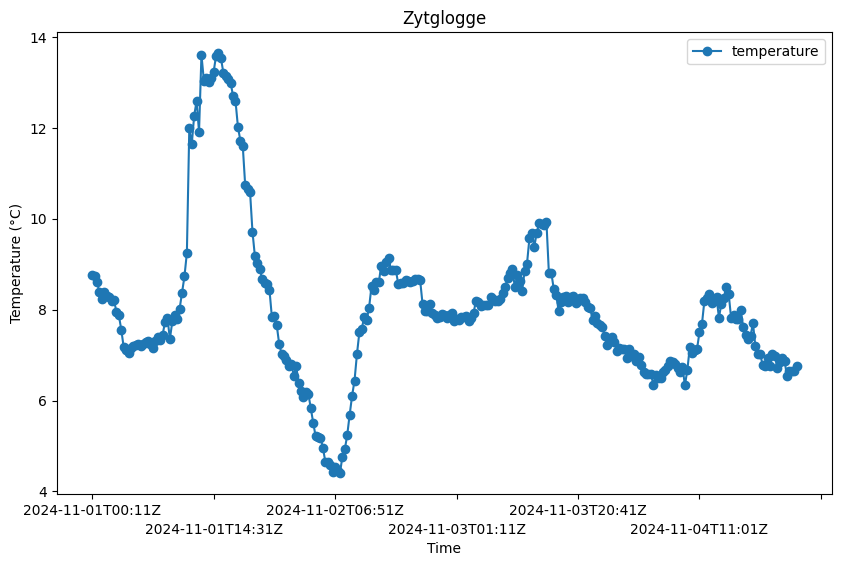

In [17]:
# Use the DataFrame plot function to plot the temperature time series as a line plot with markers
ax = timeseries.plot(x='dateObserved', y='temperature', figsize=(10,6), marker='o', linestyle='-')
# The ax object is a matplotlib axis object which we can use to further customize the plot

# Add a title
ax.set_title(stationName)

# Add labels for the x and y axes
ax.set_xlabel('Time')
ax.set_ylabel('Temperature (°C)')

# Shift every second x-label for better readability
for i, label in enumerate(ax.get_xticklabels()):
    if i % 2 == 0:  # Check if it's an odd tick
        label.set_y(-0.04)

To add relative humidity to the same plot we can create a second axis using the `twinx()` function:

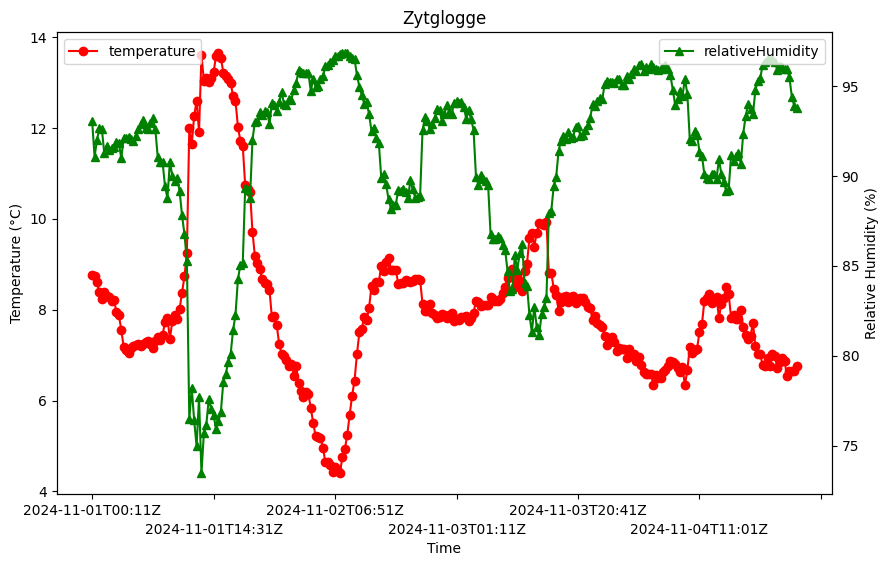

In [18]:
# Use the DataFrame plot function to plot the temperature time series as a line plot with markers
ax = timeseries.plot(x='dateObserved', y='temperature', figsize=(10,6), marker='o', color='red', linestyle='-')
# The ax object is a matplotlib axis object which we can use to further customize the plot

# Create a second axis for relative humidity
ax2 = ax.twinx()
# Plot relative humidity on the second y-axis by specifying the ax object
timeseries.plot(x='dateObserved', y='relativeHumidity', ax=ax2, color='green', marker='^', linestyle='-')

# Add a title
ax.set_title(stationName)

# Add labels for the x and y axes
ax.set_xlabel('Time')
ax.set_ylabel('Temperature (°C)')
ax2.set_ylabel('Relative Humidity (%)')

# Adjust positions of legends to match positions of y-axes
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

# Shift every second x-label for better readability
for i, label in enumerate(ax.get_xticklabels()):
    if i % 2 == 0:  # Check if it's an odd tick
        label.set_y(-0.04)

Or display the temperature of multiple stations:

Text(0, 0.5, 'Temperature (°C)')

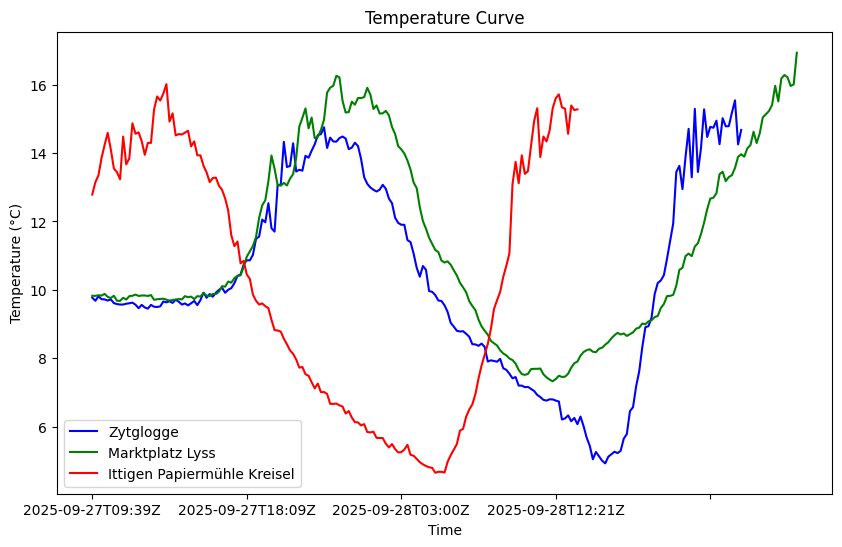

In [20]:
import matplotlib.pyplot as plt

# Define function to read the data for a specific station and a specific time range.
# Returns the data as a Pandas dataframe
def getData(stationName, startTime, endTime):
    #Define the headers to request CSV data as a python dictionary
    headers = {
        "Accept": "text/csv"
    }

    # Read the data
    stationId = stations[stations["name"] == stationName].stationId.values[0]
    # Define the URL including the stationId argument
    url = f"https://smart-urban-heat-map.ch/api/v2/timeseries?stationId={stationId}&timeFrom={startTime}&timeTo={endTime}"

    # Make the GET request with the headers
    response = requests.get(url, headers=headers)
    return pd.read_csv(io.StringIO(response.text), delimiter=";")

# Define the time intervall we're interested in
startTime = "2025-09-27T00:00:00Z" # 28.09.23 00:00 ; Z means UTC time
endTime = "2025-09-29T23:00:00Z" # 31.09.23 23:00

# Read the data for the 3 stations:
stationName1 = "Zytglogge"
stationName2 = "Marktplatz Lyss"
stationName3 = "Ittigen Papiermühle Kreisel"
timeseries1 = getData(stationName1, startTime, endTime)
timeseries2 = getData(stationName2, startTime, endTime)
timeseries3 = getData(stationName3, startTime, endTime)

# Now plot the data
plt.figure(figsize=(10, 6))


# Use the DataFrame plot function to plot the temperature time series as a line plot with markers
timeseries1.plot(x='dateObserved', y='temperature', label=stationName1, marker=None, color='blue', linestyle='-', ax=plt.gca())
timeseries2.plot(x='dateObserved', y='temperature', label=stationName2, marker=None, color='green', linestyle='-', ax=plt.gca())
timeseries3.plot(x='dateObserved', y='temperature', label=stationName3, marker=None, color='red', linestyle='-', ax=plt.gca())

plt.title('Temperature Curve')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')